# Handwritten Digit Recognisation using SVC

### Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [3]:
from sklearn.datasets import load_digits

In [6]:
data = load_digits()

In [9]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

### Summarise the dataset

In [11]:
print(data.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [16]:
print(data.target)

[0 1 2 ... 8 9 8]


In [17]:
print(data.data.shape)
print(data.images.shape)

(1797, 64)
(1797, 8, 8)


In [18]:
dataimagelength = len(data.images)
print(dataimagelength)

1797


### Visualize the data

Enter the Number :  25


<Figure size 640x480 with 0 Axes>

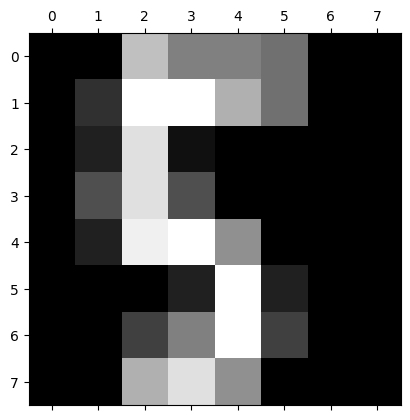

array([[ 0.,  0., 12.,  8.,  8.,  7.,  0.,  0.],
       [ 0.,  3., 16., 16., 11.,  7.,  0.,  0.],
       [ 0.,  2., 14.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 14.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 15., 16.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  4.,  8., 16.,  4.,  0.,  0.],
       [ 0.,  0., 11., 14.,  9.,  0.,  0.,  0.]])

In [21]:
n=int(input("Enter the Number : "))#Which sample out of all samples you want to visualise
plt.gray()
plt.matshow(data.images[n])
plt.show()

data.images[n]

### Dividing dataset into X , Y

In [22]:
X= data.images.reshape((dataimagelength,-1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
Y = data.target
Y

array([0, 1, 2, ..., 8, 9, 8])

### Spliting the dataset

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [30]:
print(x_train)
x_train.shape

[[ 0.  3. 13. ... 12.  9.  1.]
 [ 0.  0.  1. ... 13.  1.  0.]
 [ 0.  0.  4. ...  9.  0.  0.]
 ...
 [ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  6. ... 11.  0.  0.]]


(1347, 64)

In [31]:
print(x_test)
x_test.shape

[[ 0.  0. 11. ... 13. 16.  8.]
 [ 0.  1. 15. ...  1.  0.  0.]
 [ 0.  2. 13. ... 16. 16.  3.]
 ...
 [ 0.  0. 11. ...  7.  0.  0.]
 [ 0.  0.  5. ...  7.  0.  0.]
 [ 0.  2. 14. ...  6.  0.  0.]]


(450, 64)

In [32]:
print(y_train)
y_train.shape

[2 8 9 ... 7 7 8]


(1347,)

In [33]:
print(y_test)
y_test.shape

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9]


(450,)

### Training the dataset

In [34]:
from sklearn import svm

In [36]:
model= svm.SVC(kernel="linear")

In [37]:
model.fit(x_train,y_train)

SVC(kernel='linear')

### Predicting what the digit actually from test data

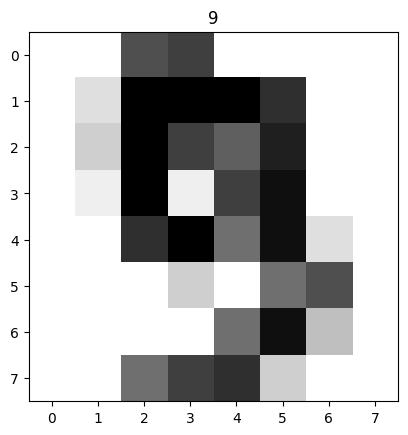

In [54]:
n=9
result = model.predict(data.images[n].reshape(1,-1))
plt.imshow(data.images[n],cmap=plt.cm.gray_r,interpolation='nearest')
print("\n")
#plt.axis("off")
plt.title("%i" %result)
plt.show()

### Prediction For test data

In [55]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [8 8]
 [2 2]
 [6 6]
 [6 6]
 [7 7]
 [1 1]
 [9 9]
 [8 8]
 [5 5]
 [2 2]
 [8 8]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [1 1]
 [0 0]
 [5 5]
 [8 8]
 [8 8]
 [7 7]
 [8 8]
 [4 4]
 [7 7]
 [5 5]
 [4 4]
 [9 9]
 [2 2]
 [9 9]
 [4 4]
 [7 7]
 [6 6]
 [8 8]
 [9 9]
 [4 4]
 [3 3]
 [1 1]
 [0 0]
 [1 1]
 [8 8]
 [6 6]
 [7 7]
 [7 7]
 [1 1]
 [0 0]
 [7 7]
 [6 6]
 [2 2]
 [1 1]
 [9 9]
 [6 6]
 [7 7]
 [9 9]
 [0 0]
 [0 0]
 [5 5]
 [1 1]
 [6 6]
 [3 3]
 [0 0]
 [2 2]
 [3 3]
 [4 4]
 [1 1]
 [9 9]
 [2 2]
 [6 6]
 [9 9]
 [1 1]
 [8 8]
 [3 3]
 [5 5]
 [1 1]
 [2 2]
 [8 8]
 [2 2]
 [2 2]
 [9 9]
 [7 7]
 [2 2]
 [3 3]
 [6 6]
 [0 0]
 [5 5]
 [3 3]
 [7 7]
 [5 5]
 [1 1]
 [2 2]
 [9 9]
 [9 9]
 [3 3]
 [1 1]
 [7 7]
 [7 7]
 [4 4]
 [8 8]
 [5 5]
 [8 8]
 [5 5]
 [5 5]
 [2 2]
 [5 5]
 [9 9]
 [0 0]
 [7 7]
 [1 1]
 [4 4]
 [4 7]
 [3 3]
 [4 4]
 [8 8]
 [9 9]
 [7 7]
 [9 9]
 [8 8]
 [2 2]
 [1 6]
 [5 5]
 [2 2]
 [5 5]
 [8 8]
 [4 4]
 [1 8]
 [7 7]
 [0 0]
 [6 6]
 [1 1]
 [5 5]
 [5 9]
 [9 9]
 [9 9]
 [5 5]
 [9 9]
 [9 9]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [2 2]
 [8 8]
 [6 6]

### Evaluation

In [56]:
from sklearn.metrics import accuracy_score

In [58]:
accu = accuracy_score(y_pred,y_test)
print("Accuracy of model is : ",accu*100,"%")

Accuracy of model is :  97.11111111111111 %


### Building the model with different kernel

In [59]:
from sklearn import svm


In [74]:
model_rbf = svm.SVC(kernel="rbf")
model_gamma = svm.SVC(gamma=0.001)
model_gamma1 = svm.SVC(gamma=0.001,C=0.7)

model_rbf.fit(x_train,y_train)
model_gamma.fit(x_train,y_train)
model_gamma1.fit(x_train,y_train)

y_pred_rbf=model_rbf.predict(x_test)
y_pred_gamma=model_gamma.predict(x_test)
y_pred_gamma1=model_gamma1.predict(x_test)

#print(np.concatenate((y_pred_rbf.reshape(len(y_pred_rbf),1),y_test.reshape(len(y_test),1)),1))
#print(np.concatenate((y_pred_gamma.reshape(len(y_pred_gamma),1),y_test.reshape(len(y_test),1)),1))

accu_rbf = accuracy_score(y_pred_rbf,y_test)
print("Accuracy of RBF model is : ",accu_rbf*100,"%")

accu_gamma = accuracy_score(y_pred_gamma,y_test)
print("Accuracy of Gamma model is : ",accu_gamma*100,"%")

accu_gamma1 = accuracy_score(y_pred_gamma1,y_test)
print("Accuracy of Gamma1 model is : ",accu_gamma1*100,"%")

Accuracy of RBF model is :  99.11111111111111 %
Accuracy of Gamma model is :  99.55555555555556 %
Accuracy of Gamma1 model is :  99.77777777777777 %
